# Spam Detection Project Reproduce One-to-One

In [2]:
import os
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import patsy

Import the dataset:

In [3]:
os.chdir("C:\\Users\\justy\\Desktop\\Info\\Inne\\DSC\\UW\\Semestr II\\Econometrics\\Project")

spam = pd.read_csv("spambase.data", header=None)
names = pd.read_csv("names.csv", header=None)

In [4]:
spam.describe

<bound method NDFrame.describe of         0     1     2    3     4     5     6     7     8     9   ...     48  \
0     0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
1     0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.000   
2     0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.010   
3     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
4     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
...    ...   ...   ...  ...   ...   ...   ...   ...   ...   ...  ...    ...   
4596  0.31  0.00  0.62  0.0  0.00  0.31  0.00  0.00  0.00  0.00  ...  0.000   
4597  0.00  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4598  0.30  0.00  0.30  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.102   
4599  0.96  0.00  0.00  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4600  0.00  0.00  0.65  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   

         49   50 

In [5]:
names.describe

<bound method NDFrame.describe of                              0
0               word_freq_make
1            word_freq_address
2                word_freq_all
3                 word_freq_3d
4                word_freq_our
5               word_freq_over
6             word_freq_remove
7           word_freq_internet
8              word_freq_order
9               word_freq_mail
10           word_freq_receive
11              word_freq_will
12            word_freq_people
13            word_freq_report
14         word_freq_addresses
15              word_freq_free
16          word_freq_business
17             word_freq_email
18               word_freq_you
19            word_freq_credit
20              word_freq_your
21              word_freq_font
22               word_freq_000
23             word_freq_money
24                word_freq_hp
25               word_freq_hpl
26            word_freq_george
27               word_freq_650
28               word_freq_lab
29              word_freq_labs
30   

In [6]:
names.loc[48, 0] = "char_freq_semicolon"
names.loc[49, 0] = "char_freq_bracket"
names.loc[50, 0] = "char_freq_square_bracket"
names.loc[51, 0] = "char_freq_exclamation"
names.loc[52, 0] = "char_freq_dollar"
names.loc[53, 0] = "char_freq_hashtag"
names.loc[57, 0] = "spam"

In [7]:
spam.columns = names[0].values

spam.dropna(inplace=True)

In [8]:
spam.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


Let us check the distribution of spam and non-spam mails

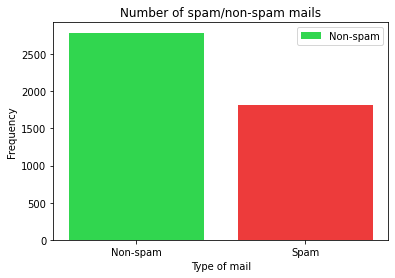

In [9]:
spam_count = spam["spam"].value_counts()
perc_yes = round(spam_count[1] / len(spam) * 100, 2)
perc_no = round(spam_count[0] / len(spam) * 100, 2)

plt.bar(["Non-spam", "Spam"], spam_count, color=["#31d64f", "#ed3b3b"])
plt.title("Number of spam/non-spam mails")
plt.xlabel("Type of mail")
plt.ylabel("Frequency")
plt.legend(["Non-spam", "Spam"])
plt.show()

## Start from the most general model that contains all explanatory variables

In [10]:
formula = "spam ~ " + " + ".join(spam.columns[:-1])

Probit model

In [11]:
myprobit = sm.Probit.from_formula(formula, data=spam).fit()
print(myprobit.summary())

Optimization terminated successfully.
         Current function value: 0.207573
         Iterations 15
                          Probit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 4601
Model:                         Probit   Df Residuals:                     4543
Method:                           MLE   Df Model:                           57
Date:                Fri, 16 Jun 2023   Pseudo R-squ.:                  0.6904
Time:                        01:26:35   Log-Likelihood:                -955.04
converged:                       True   LL-Null:                       -3085.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.8356      0.075    -11.098      0.000     

Logit model

In [12]:
mylogit = sm.Logit.from_formula(formula, data=spam).fit()
print(mylogit.summary())

Optimization terminated successfully.
         Current function value: 0.197323
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4543
Method:                           MLE   Df Model:                           57
Date:                Fri, 16 Jun 2023   Pseudo R-squ.:                  0.7057
Time:                        01:26:36   Log-Likelihood:                -907.88
converged:                       True   LL-Null:                       -3085.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.5686      0.142    -11.044      0.000     

# Significance test of models

Both models p-values are 0, so null hypothesis can be rejected. It means that the model`s coefficients are jointly significant

In [13]:
null_probit = sm.Probit(spam["spam"], sm.add_constant(pd.Series([1] * len(spam)))).fit()
probit_lrtest = stats.chi2.sf(2 * (myprobit.llf - null_probit.llf), 1)
print("Probit likelihood ratio test p-value:", probit_lrtest)

Optimization terminated successfully.
         Current function value: 0.670523
         Iterations 4
Probit likelihood ratio test p-value: 0.0


In [14]:
null_logit = sm.Logit(spam["spam"], sm.add_constant(pd.Series([1] * len(spam)))).fit()
logit_lrtest = stats.chi2.sf(2 * (mylogit.llf - null_logit.llf), 1)
print("Logit likelihood ratio test p-value:", logit_lrtest)

Optimization terminated successfully.
         Current function value: 0.670523
         Iterations 4
Logit likelihood ratio test p-value: 0.0


## Stepwise regression

In [15]:
p_probit = myprobit.pvalues
spam_temp_probit = spam.copy()

while any(p_probit > 0.05):
    worstp = p_probit.idxmax()
    
    print(worstp)
    spam_temp_probit.drop(columns=worstp, inplace=True)
    
    formula = "spam ~"
    
    for column in spam_temp_probit.columns[:-1]:
        formula += f" + {column}"
    
    myprobit = sm.Probit.from_formula(formula, data=spam_temp_probit).fit()
    p_probit = myprobit.pvalues
    print(myprobit.aic)

word_freq_1999


Optimization terminated successfully.
         Current function value: 0.207573
         Iterations 15
2024.088917331387
word_freq_people
Optimization terminated successfully.
         Current function value: 0.207579
         Iterations 15
2022.1381806395907
word_freq_415
Optimization terminated successfully.
         Current function value: 0.207587
         Iterations 15
2020.2155613834486
capital_run_length_average
Optimization terminated successfully.
         Current function value: 0.207597
         Iterations 15
2018.3090124810756
word_freq_telnet
Optimization terminated successfully.
         Current function value: 0.207632
         Iterations 15
2016.6278326615745
word_freq_receive
Optimization terminated successfully.
         Current function value: 0.207662
         Iterations 15
2014.9078328699995
word_freq_direct
Optimization terminated successfully.
         Current function value: 0.207723
         Iterations 15
2013.4677960927206
word_freq_857
Optimization terminated

In [16]:
p_logit = mylogit.pvalues
spam_temp_logit = spam.copy()

while any(p_logit > 0.05):
    worstp = p_logit.idxmax()
    
    print(worstp)
    spam_temp_logit.drop(columns=worstp, inplace=True)
    
    formula = "spam ~"
    
    for column in spam_temp_logit.columns[:-1]:
        formula += f" + {column}"
    
    mylogit = sm.Logit.from_formula(formula, data=spam_temp_logit).fit()
    p_logit = mylogit.pvalues
    print(mylogit.aic)

word_freq_1999
Optimization terminated successfully.
         Current function value: 0.197330
         Iterations 15
1929.8351001472463
word_freq_telnet
Optimization terminated successfully.
         Current function value: 0.197358
         Iterations 15
1928.0866448894978
word_freq_people
Optimization terminated successfully.
         Current function value: 0.197372
         Iterations 15
1926.2137629946117
word_freq_415
Optimization terminated successfully.
         Current function value: 0.197392
         Iterations 15
1924.4056155735882
capital_run_length_average
Optimization terminated successfully.
         Current function value: 0.197440
         Iterations 15
1922.846172866969
char_freq_bracket
Optimization terminated successfully.
         Current function value: 0.197500
         Iterations 15
1921.3991742674934
word_freq_857
Optimization terminated successfully.
         Current function value: 0.197573
         Iterations 15
1920.0647903082443
char_freq_square_bracket


### Interaction terms
Adding interaction terms and deleting insignificant ones for probit.

In [17]:
formula_interactions = "spam ~ word_freq_make + word_freq_address + word_freq_our + word_freq_over + word_freq_remove + word_freq_internet + word_freq_order + word_freq_free + word_freq_business + word_freq_you + word_freq_credit + word_freq_your + word_freq_000 + word_freq_money + word_freq_hp + word_freq_hpl + word_freq_george + word_freq_650 + word_freq_data + word_freq_85 + word_freq_technology + word_freq_pm + word_freq_meeting + word_freq_project + word_freq_re + word_freq_edu + word_freq_conference + char_freq_semicolon + char_freq_exclamation + char_freq_dollar + char_freq_hashtag + capital_run_length_longest + capital_run_length_total"
myprobit = sm.Probit.from_formula(formula_interactions, data=spam).fit()
p_probit = myprobit.pvalues
spam_temp_probit = spam.copy()

while any(p_probit > 0.05):
    worstp = p_probit.idxmax()
    
    print(worstp)
    spam_temp_probit.drop(columns=worstp, inplace=True)
    
    formula = formula_interactions
    
    for column in spam_temp_probit.columns[:-1]:
        formula += f" + {column}"
    
    myprobit = sm.Probit.from_formula(formula, data=spam_temp_probit).fit()
    p_probit = myprobit.pvalues
    print(myprobit.aic)


Optimization terminated successfully.
         Current function value: 0.218602
         Iterations 13


In [18]:
probit_lrtest = stats.chi2.sf(2 * (myprobit.llf - null_probit.llf), 1)
print("Probit likelihood ratio test p-value:", probit_lrtest)

Probit likelihood ratio test p-value: 0.0


In [19]:
mylogit = sm.Logit.from_formula(formula_interactions, data=spam).fit()
p_logit = mylogit.pvalues
spam_temp_logit = spam.copy()

while any(p_logit > 0.05):
    worstp = p_logit.idxmax()
    
    print(worstp)
    spam_temp_logit.drop(columns=worstp, inplace=True)
    
    formula = formula_interactions
    
    for column in spam_temp_logit.columns[:-1]:
        formula += f" + {column}"
    
    mylogit = sm.Logit.from_formula(formula, data=spam_temp_logit).fit()
    p_logit = mylogit.pvalues
    print(mylogit.aic)

Optimization terminated successfully.
         Current function value: 0.205945
         Iterations 13


In [44]:
logit_lrtest = stats.chi2.sf(2 * (mylogit.llf - null_logit.llf), 1)
print("Logit likelihood ratio test p-value:", logit_lrtest)

Logit likelihood ratio test p-value: 0.0


## Recration from line 267 from R code

In [ ]:
formula_interactions = "spam ~ word_freq_free + word_freq_order + word_freq_receive + char_freq_hashtag * char_freq_exclamation + word_freq_telnet + word_freq_technology + word_freq_conference * word_freq_edu + word_freq_hp + word_freq_money + word_freq_credit + word_freq_000 + char_freq_dollar + word_freq_your * word_freq_email * word_freq_address + word_freq_people + word_freq_mail + word_freq_george + word_freq_our * word_freq_meeting"

myprobit = sm.Probit.from_formula(formula=formula_interactions, data=spam).fit()

p = myprobit.pvalues
print(p)

Optimization terminated successfully.
         Current function value: 0.268006
         Iterations 13
Intercept                                           1.060829e-58
word_freq_free                                      2.013689e-27
word_freq_order                                     3.707155e-05
word_freq_receive                                   5.922157e-01
char_freq_hashtag                                   4.317635e-02
char_freq_exclamation                               6.030368e-08
char_freq_hashtag:char_freq_exclamation             9.817137e-05
word_freq_telnet                                    1.765068e-01
word_freq_technology                                1.495378e-03
word_freq_conference                                4.159086e-03
word_freq_edu                                       1.100515e-15
word_freq_conference:word_freq_edu                  5.262433e-01
word_freq_hp                                        8.853227e-28
word_freq_money                                     

In [245]:
i = 1
while any(p > 0.05):
    worstp = p.idxmax()
    print(worstp)

    if i == 1:
        # Remove the outcome variable from the formula
        formula_interactions = formula_interactions.replace("spam ~ ", "")

        # Create the design matrix with interaction terms
        X = patsy.dmatrix(formula_interactions, data=spam)

        # Convert the design matrix to a DataFrame
        X = pd.DataFrame(X, columns=X.design_info.column_names)
        i=2
    else:
        X = X.drop(worstp, axis=1)
        X_names = ['Intercept'] + list(X.columns)[1:]
        X.columns = X_names

        myprobit = sm.Probit(spam['spam'], X).fit()

        print(myprobit.summary())
        p = myprobit.pvalues
        print(myprobit.aic)

word_freq_our:word_freq_meeting
word_freq_our:word_freq_meeting
Optimization terminated successfully.
         Current function value: 0.268018
         Iterations 13
                          Probit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 4601
Model:                         Probit   Df Residuals:                     4572
Method:                           MLE   Df Model:                           28
Date:                Fri, 16 Jun 2023   Pseudo R-squ.:                  0.6003
Time:                        01:02:47   Log-Likelihood:                -1233.2
converged:                       True   LL-Null:                       -3085.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------